## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

## **문제상황 및 데이터 살펴보기**
---
> **시나리오**

```
고객 이탈은 고객이 회사나 서비스 제공자와의 관계나 구독을 중단하는 현상을 말합니다. 이는 고객이 특정 기간 내에 회사의 제품이나 서비스 사용을 중단하는 비율을 나타냅니다. 이탈은 매출, 성장, 고객 유지에 직접적인 영향을 미치기 때문에 기업에 중요한 지표입니다.

고객 이탈을 이해하는 것은 기업이 고객 이탈에 기여하는 패턴, 요인 및 지표를 파악하는 데 매우 중요합니다. 이탈 행동과 관련 특징을 분석함으로써 기업은 기존 고객을 유지하고, 고객 만족도를 높이고, 고객 이탈을 줄이는 전략을 개발할 수 있습니다. 예측 모델링 기법을 적용하여 잠재적인 이탈을 예측하고 사전에 대처할 수도 있으므로 기업은 위험에 처한 고객을 유지하기 위한 사전 조치를 취할 수 있습니다.

데이터에서 어떤 요인이 고객의 유지 이탈에 지대한 영향을 끼치는지 분석하고 이를 예측하는 모델을 만들고자 한다.
```  

> **데이터 살펴보기**

* 고객 데이터
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|customerID|고객ID| 
|Age|나이|
|Gender|성별|
|Tenure|구독 기간|
|Usage_Frequency|사용 빈도|
|Support_Calls|고객지원상담 횟수|
|Payment_Delay|결제 지연|
|Subscription_Type|구독 유형|
|Contract_Length|구독기간유형|
|Total_Spend|총 지출|
|Last_Interaction|마지막 상호작용|
|Churn|이탈여부 0 - 유지 1 - 이탈 |



In [207]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [208]:
## 데이터 확인
# Traing set
df_train = pd.read_csv('customer_churn_dataset-training-master.csv')
df_train.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [209]:
# test set
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv')
df_test.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


> **문제 정의**
```
- 고객의 구독 서비스 이탈
```

> **기대 효과**
```
- 구독 서비스 이탈 감소, 수익률 향상
```


> **해결 방안**
```
- 구독 서비스 이탈 예측 모델링을 통한 이탈요인 예방

- Data 전처리 및 EDA

- 가설 수립 및 검증

- 예측 모델링 수행
```

## Data 전처리 EDA

1. 데이터 확인
2. 데이터 Type 확인
3. 결측치 및 NUll값 확인
4. 이상치 확인

### 데이터 확인

In [210]:
# 데이터 확인
print("Trainset", df_train.shape)
print("Testset", df_test.shape)

Trainset (440833, 12)
Testset (64374, 12)


### 데이터 Type 확인_결측치 확인

In [211]:
# 데이터 Type 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [212]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


- 데이터 값에 결측값은 존재하지않음
- 데이터 타입이 test set의 경우 int형으로 train set의 경우 float형으로 저장되어 있음

### Null값 확인

In [213]:
# Train set Null값 확인
df_train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [214]:
# test set Null값 확인
df_test.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

- Train set의 경우 Null값이 존재한다.

In [215]:
df_train[df_train.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
# Train set Null값 제거
df_train = df_train.dropna()
df_train.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [217]:
# float64를 int로 변환
columns_to_convert = ['CustomerID', 'Age', 'Tenure', 'Support Calls', 'Payment Delay', 'Last Interaction', 'Churn']

df_train[columns_to_convert] = df_train[columns_to_convert].astype('int')

### 이상치 확인

In [218]:
# 이상치 확인
df_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


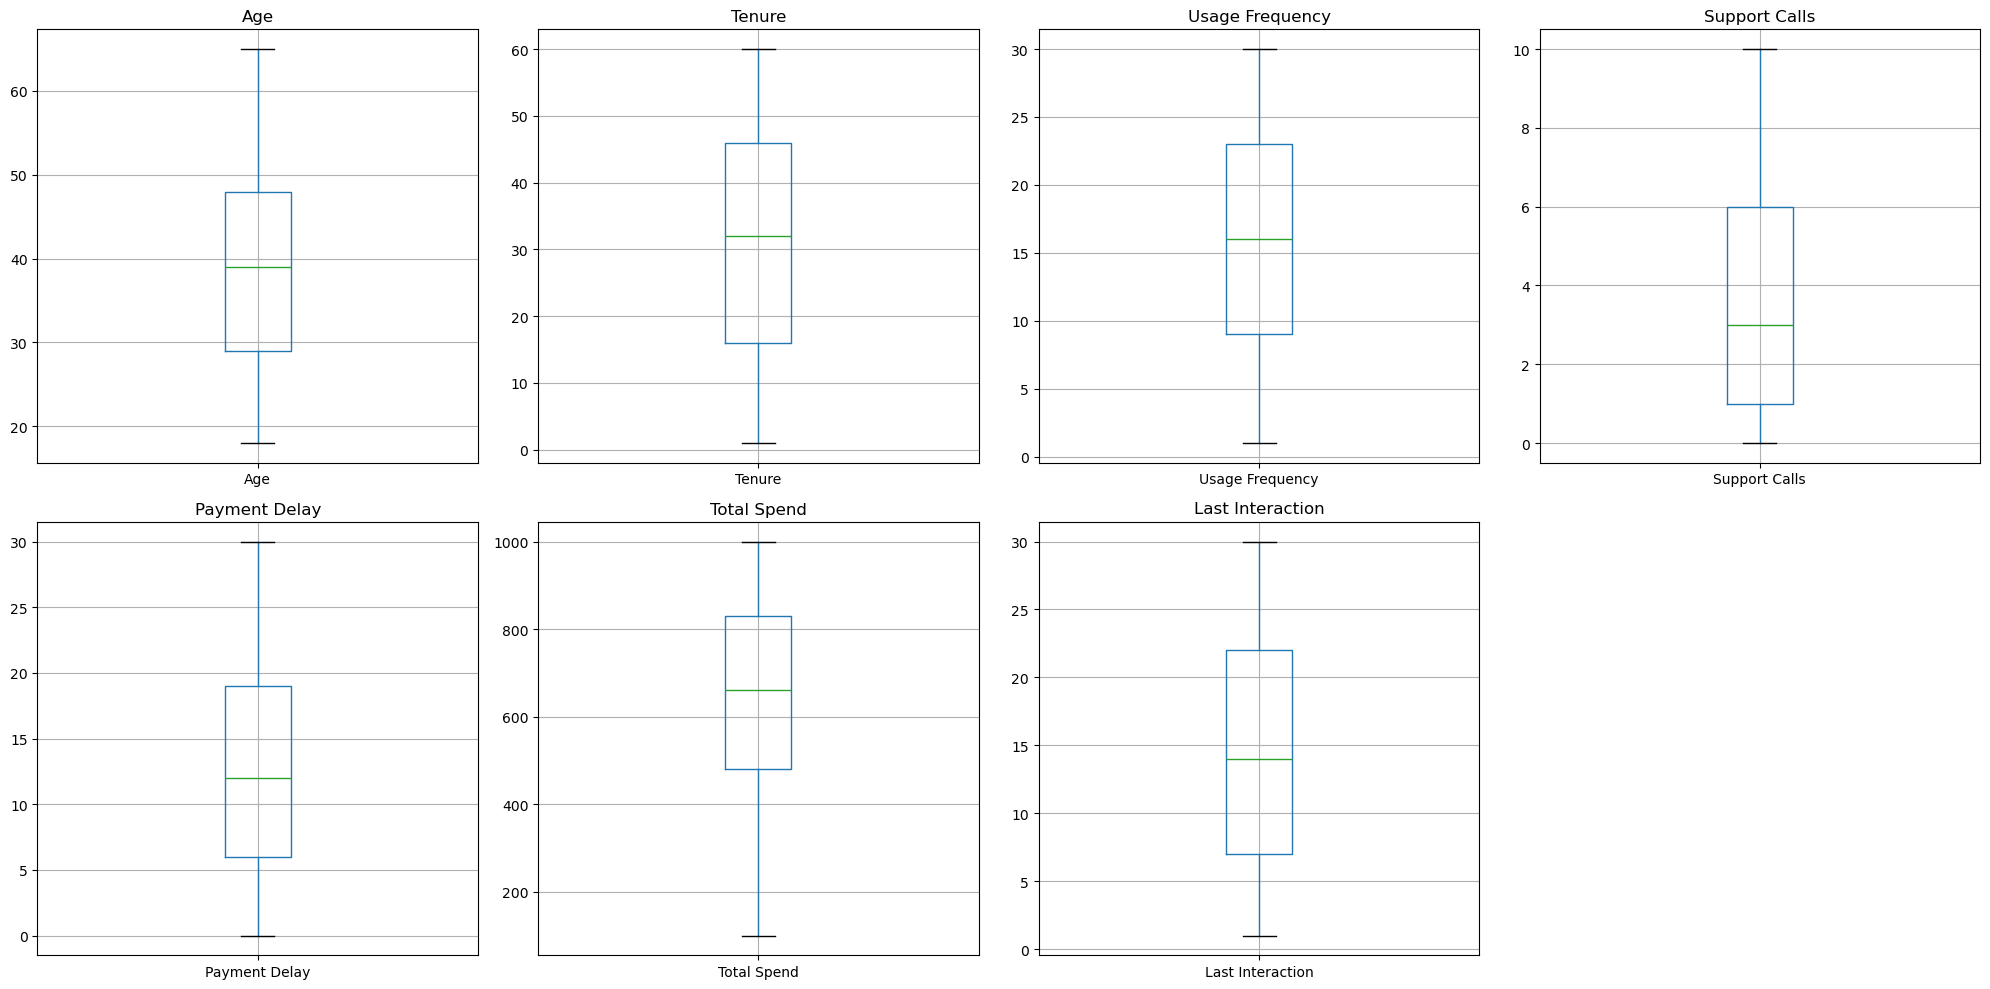

In [219]:
numeric_cols = ["Age","Tenure","Usage Frequency","Support Calls","Payment Delay","Total Spend","Last Interaction"]
numeric_cols = df_train[numeric_cols]

# 컬럼 개수만큼 서브플롯 설정
num_cols = len(numeric_cols.columns)
fig, axes = plt.subplots(nrows=num_cols//4 + 1, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # 축을 평면화

# 각각의 numeric 컬럼에 대해 개별 박스플롯 생성
for i, col in enumerate(numeric_cols.columns):
    numeric_cols.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# 남은 빈 서브플롯 삭제
for i in range(len(numeric_cols.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [220]:
# Boxplot에서 수염을 기준으로 outlier의 갯수
outliers = {}

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)).sum()

# 결과 출력
print("이상치 개수:")
for col, count in outliers.items():
    print(f"{col}: {count}")

이상치 개수:
Age: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Total Spend: 0
Last Interaction: 0


## 파생변수

In [221]:
# 1. 나이별 그룹
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['10', '20', '30', '40', '50', '60']
df_train['Age_group'] = pd.cut(df_train['Age'], bins = bins, labels = labels)
df_test['Age_group'] = pd.cut(df_test['Age'], bins = bins, labels = labels)

## 데이터 특성 파악

1. 우량고객 특성파악
2. 이탈고객 특성파악

### 연속형 변수

**나이가 많을 수록 이탈률이 높을것이다.**

**사용빈도가 적을수록 이탈률이 높을것이다.**

**고객지원상담 횟수가 많을수록 이탈률이 높을것이다.**

**결제 지연이 많을 수록 이탈률이 높을것이다.**

**총 지출에 낮을수록 이탈률이 높을것이다.**

**마지막 상호작용 시점이 이를수록 이탈률이 높을것이다.**

--------------------------------------------------------------------------------
### 범주형 변수

**성별에 따른 이탈률 차이가 존재할것이다.**

**구독 유형 (Standard, Basic, Premium)이 Basic일때 이탈률이 높을것이다.**

**구독 기간 유형 (Monthly, Quarterly, Annual)이 Montly인 경우 이탈률이 높을것이다.**


In [222]:
df_train['Churn'].value_counts()

Churn
1    249999
0    190833
Name: count, dtype: int64

In [223]:
# 약 57%의 이탈률
249999 / (190833 + 249999)

0.5671071972996515

            count    sum  ratio
Age_group                      
10          25845  15649   60.5
20          97088  51638   53.2
30         111472  51030   45.8
40         124773  50028   40.1
50          54443  54443  100.0
60          27211  27211  100.0


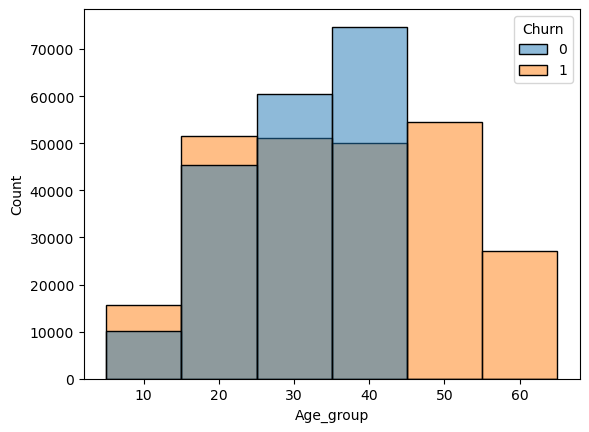

In [224]:
# 나이별 구독자 수 Bar chart
ax = sns.histplot(data = df_train, x = 'Age_group', hue = 'Churn')

df_gp = df_train.groupby("Age_group")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

                 count   sum  ratio
Usage Frequency                    
1.0              13797  8515   61.7
2.0              13633  8477   62.2
3.0              13843  8412   60.8
4.0              13549  8326   61.5
5.0              13716  8421   61.4
6.0              13746  8517   62.0
7.0              13555  8111   59.8
8.0              13725  8477   61.8
9.0              13770  8431   61.2
10.0             15090  8251   54.7
11.0             15311  8446   55.2
12.0             15179  8344   55.0
13.0             15015  8221   54.8
14.0             15094  8347   55.3
15.0             15129  8254   54.6
16.0             14949  8215   55.0
17.0             15058  8228   54.6
18.0             14871  8117   54.6
19.0             15204  8367   55.0
20.0             15258  8299   54.4
21.0             15205  8379   55.1
22.0             15005  8290   55.2
23.0             15072  8352   55.4
24.0             15038  8257   54.9
25.0             15237  8268   54.3
26.0             15134  8344

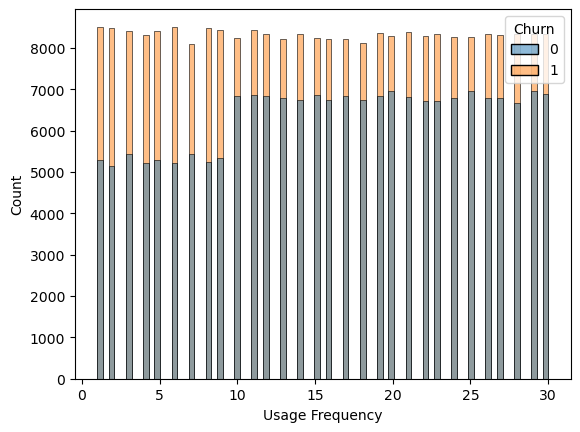

In [225]:
# 사용 빈도별 
sns.histplot(data=df_train, x='Usage Frequency', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

df_gp = df_train.groupby("Usage Frequency")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)    

               count    sum  ratio
Support Calls                     
0              69875  21160   30.3
1              69476  21095   30.4
2              66571  21004   31.6
3              52729  21958   41.6
4              38750  22668   58.5
5              24918  23601   94.7
6              23554  23554  100.0
7              23870  23870  100.0
8              23559  23559  100.0
9              23630  23630  100.0
10             23900  23900  100.0


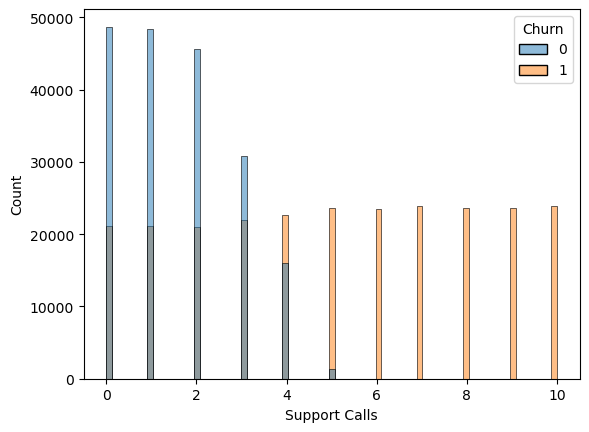

In [226]:
# 고객지원상담 횟수
sns.histplot(data=df_train, x='Support Calls', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')


df_gp = df_train.groupby("Support Calls")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)     

               count   sum  ratio
Payment Delay                    
0              16904  7889   46.7
1              17021  7793   45.8
2              16822  7853   46.7
3              17025  7930   46.6
4              16938  7852   46.4
5              16744  7806   46.6
6              16954  7915   46.7
7              17027  7888   46.3
8              16892  7959   47.1
9              16869  7871   46.7
10             17051  7869   46.1
11             17185  8065   46.9
12             17198  7940   46.2
13             17095  7929   46.4
14             17078  7938   46.5
15             17015  7988   46.9
16             17021  7995   47.0
17             16869  7847   46.5
18             17027  7861   46.2
19             16892  7785   46.1
20             17175  7996   46.6
21              8670  8670  100.0
22              8454  8454  100.0
23              8323  8323  100.0
24              8325  8325  100.0
25              8362  8362  100.0
26              8383  8383  100.0
27            

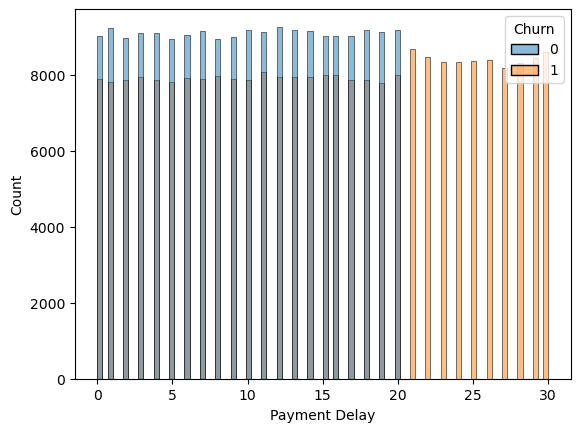

In [227]:
# 결제 지연
sns.histplot(data=df_train, x='Payment Delay', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

df_gp = df_train.groupby("Payment Delay")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)  

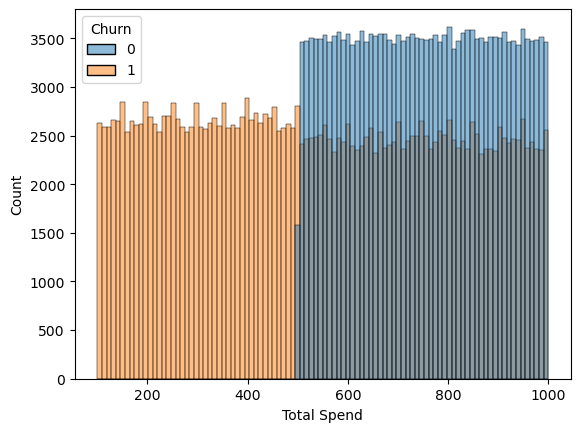

In [228]:
# 총 지출
sns.histplot(data=df_train, x='Total Spend', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

                  count   sum  ratio
Last Interaction                    
1                 16727  8165   48.8
2                 16663  8241   49.5
3                 16711  8280   49.5
4                 16570  8127   49.0
5                 16710  8211   49.1
6                 16746  8239   49.2
7                 16914  8355   49.4
8                 16762  8211   49.0
9                 16532  8180   49.5
10                16685  8194   49.1
11                16508  8170   49.5
12                16722  8235   49.2
13                16624  8212   49.4
14                16771  8228   49.1
15                16750  8315   49.6
16                12789  8506   66.5
17                12534  8291   66.1
18                12635  8371   66.3
19                12780  8500   66.5
20                12639  8377   66.3
21                12645  8421   66.6
22                12690  8474   66.8
23                12644  8463   66.9
24                12893  8531   66.2
25                12603  8424   66.8
2

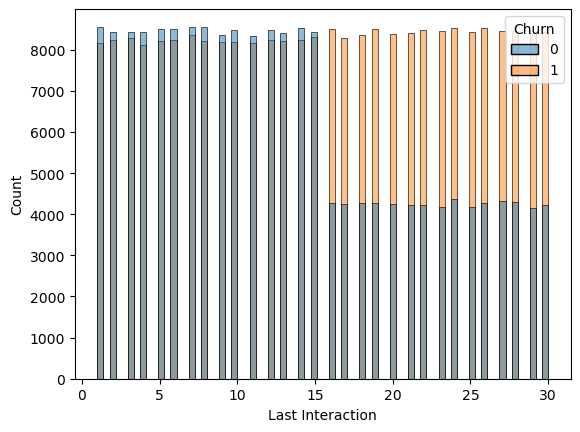

In [229]:
# 마지막 상호작용
sns.histplot(data=df_train, x='Last Interaction', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

df_gp = df_train.groupby("Last Interaction")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)  

         count     sum  ratio
Gender                       
Female  190580  127058   66.7
Male    250252  122941   49.1


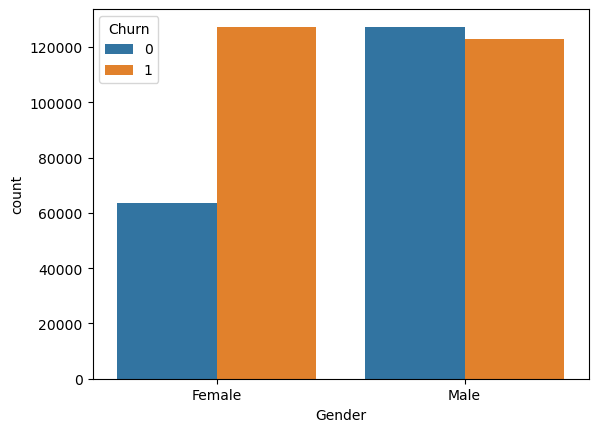

In [230]:
# 성별 별 구독자 수 Bar chart
ax = sns.countplot(data = df_train, x = 'Gender', hue = "Churn")

df_gp = df_train.groupby("Gender")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)  

                    count    sum  ratio
Subscription Type                      
Basic              143026  83210   58.2
Premium            148678  83173   55.9
Standard           149128  83616   56.1


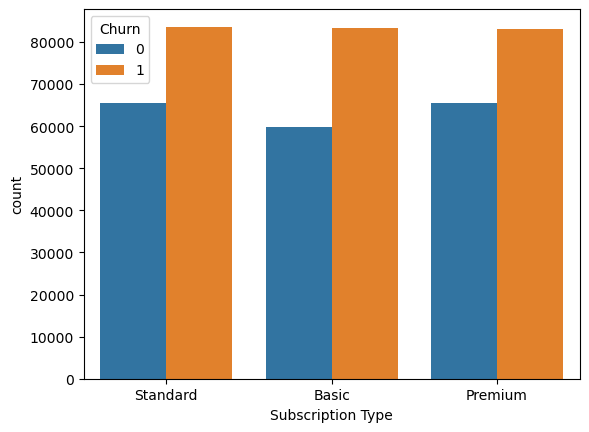

In [231]:
# 구독 유형
sns.countplot(x="Subscription Type", hue="Churn", data=df_train)

df_gp = df_train.groupby("Subscription Type")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)  

                  count    sum  ratio
Contract Length                      
Annual           177198  81646   46.1
Monthly           87104  87104  100.0
Quarterly        176530  81249   46.0


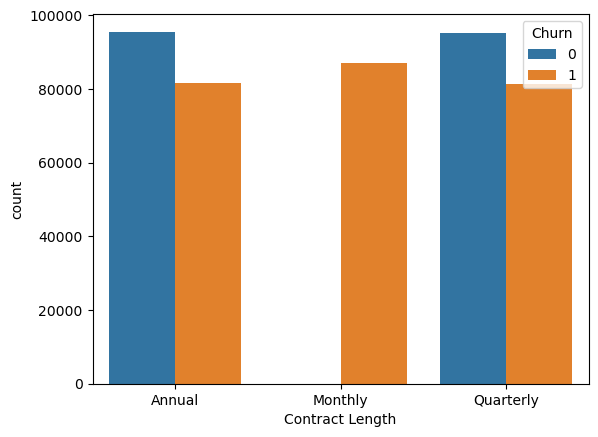

In [232]:
# 구독기간유형
sns.countplot(x="Contract Length", hue="Churn", data=df_train)

df_gp = df_train.groupby("Contract Length")['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)  

> **연령별**
```
- 10대에서 20대의 인원은 이탈고객의 숫자가 유지하는 고객보다 소폭 많은 것을 확인 할 수 있다. 30대와 40대의 경우는 유지하는 고객의 수가 이탈하는 고객의 숫자보다 많으며, 50대 이후의 연령대에서는 유지하는 고객이 존재하지 않고 모두 이탈하는 모습을 보여준다.
  
- 이는 경제적 여력이 부족한 10와 20대의 경우 이탈 고객의 숫자가 많고 경제적으로 충분히 여유가 있는 30와 40대의 경우 유지하는 고객이 많다 생각할 수 있으며 이후 은퇴후 노년기에 접어들어 일정한 수입원이 없어 불안정한 50대 이후의 나이에서 이탈고객만 존재한다고 생각해 볼 수 있다.
```

> **사용 빈도별**
```
- 사용빈도가 많고 적음에 상관없이 전체적인 이탈률은 일정하지만 사용률이 10을 넘어가는 시점에서 유지율이 10미만보다 높게 유지된다.
```

> **고객지원상담 횟수**
```
- 고객상담 지원 횟수가 증가할수록 유지율은 감속하는 경향을 보인다. 이탈률도 소폭 증가하는 양상을 보인다.
```

> **결제 지연**
```
- 결제 지연의 경운 20까지는 유지율이 이탈율보다 높은 비율을 보이나 20이후에는 이탈률만 보인다.
```

> **총 지출**
```
- 종 지출의 경우 500이상에서 유지율이 이탈율보다 높게 나타나며 그 경계에서는 이탈율이 유지율보다 높으며 500이하에서는 이탈율만 남는 모습을 보인다.
```

> **마지막 상호작용**
```
- 마지막 상호작용의 경우 15를 기준으로 유지율이 이탈율의 절반으로 감소하는 모습을 보여준다.
```

-----------------------------------------------------------------------------------------------------------
> **성별**
```
- 남성의 경우 유지하는 인원과 이탈하는 인원의 차이가 거의 존재하지 않는 것으로 보이며 여성의 경우 이탈하는 고객의 수가 유지하는 고객의 수의 2배가량 되는 모습을 보여준다.
```

> **구독 유형**
```
- 구독 유형에 따른 유지율과 이탈률에서는 가장 기본유형인 Basic유형에서의 유지율이 다른 요금제에 비해서 소폭 낮은 모습을 보여준다.
```

> **구독기간유형**
```
- 구독기간유형의 경우 연간결제와 분기결제의 경우 비슷한 모습을 보여주나 매달 결제하는 경우에는 이탈율만 보여지는 모습을 보인다. 이는 단기적으로 한달만 경험하고 헤지하는 고객이 매우 많다는 점을 보여준다.
```

### 범주형 데이터 라벨링

In [233]:
# 범주형 데이터 라벨링
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#Train set 라벨링
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_train['Subscription Type'] = label_encoder.fit_transform(df_train['Subscription Type'])
df_train['Contract Length'] = label_encoder.fit_transform(df_train['Contract Length'])

#Test set 라벨링
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test['Subscription Type'] = label_encoder.fit_transform(df_test['Subscription Type'])
df_test['Contract Length'] = label_encoder.fit_transform(df_test['Contract Length'])

## 변수 삭제

In [234]:
# CustomerID의 경우 고유값 변수로 의미없는 변수이므로 이후 모델학습을 위해 삭제한다.

df_train = df_train.drop('CustomerID', axis = 1)
df_test = df_test.drop('CustomerID', axis = 1)

In [235]:
df_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age_group
0,30,0,39,14.0,5,18,2,0,932.00,17,1,20
1,65,0,49,1.0,10,8,0,1,557.00,6,1,60
2,55,0,14,4.0,6,18,0,2,185.00,3,1,50
3,58,1,38,21.0,7,7,2,1,396.00,29,1,50
4,23,1,32,20.0,5,8,0,1,617.00,20,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42,1,54,15.0,1,3,1,0,716.38,8,0,40
440829,25,0,8,13.0,1,20,1,0,745.38,2,0,20
440830,26,1,35,27.0,1,5,2,2,977.31,9,0,20
440831,28,1,55,14.0,2,0,2,2,602.55,2,0,20


In [236]:
df_test

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age_group
0,22,0,25,14,4,27,0,1,598,9,1,20
1,41,0,28,28,7,13,2,1,584,20,0,40
2,47,1,27,10,2,29,1,0,757,21,0,40
3,35,1,9,12,5,17,1,2,232,18,0,30
4,53,0,58,24,9,2,2,0,533,18,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14,1,40
64370,37,1,6,1,5,22,2,0,923,9,1,30
64371,25,1,39,14,8,30,1,1,327,20,1,20
64372,50,0,18,19,7,22,2,1,540,13,1,40


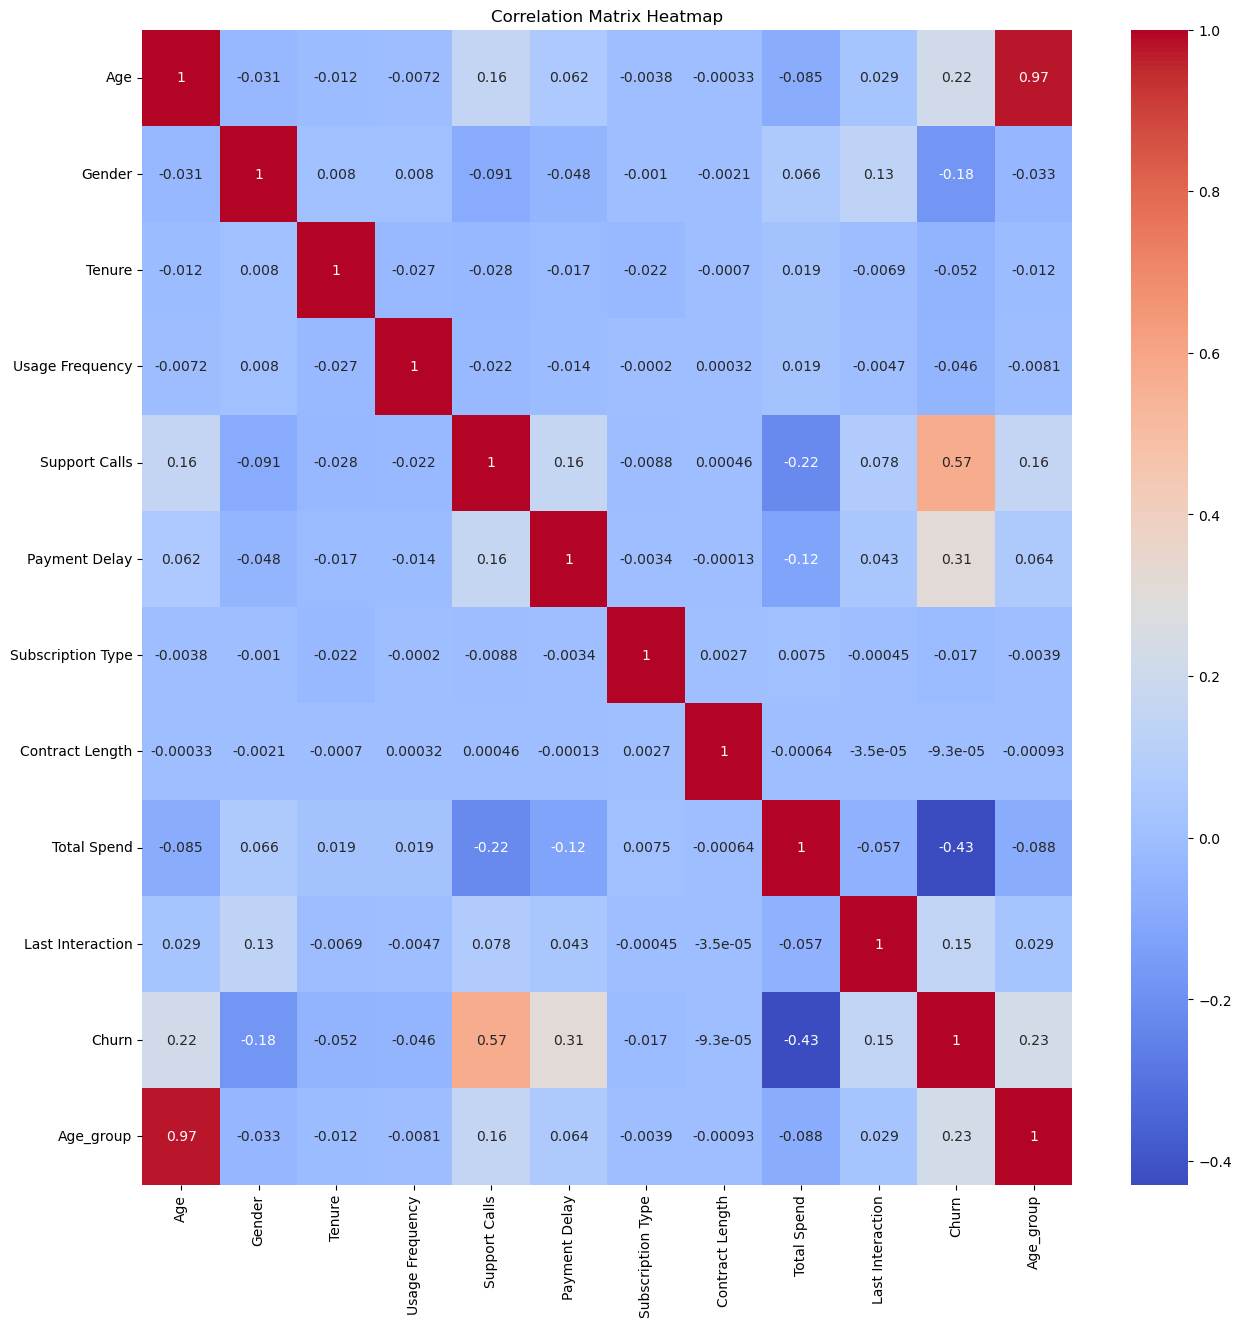

In [237]:
# 변수간의 상관관계 Heap map
corr_matrix = df_train.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

- Target변수인 Churn과 높은 상관관계를 보이는 변수는 Support calls, Total spend, Payment Delay순으로 가장 높게 나타난다.
- 서로 상관관계가 높은 Age와 Age_group중 Age_group이 Target변수와의 상관관계가 더 높으므로 Age변수를 삭제한다.

In [238]:
# Age변수 삭제

df_train = df_train.drop('Age', axis = 1)
df_test = df_test.drop('Age', axis = 1)

df_train['Age_group'] = df_train['Age_group'].cat.codes.astype(int)
df_test['Age_group'] = df_test['Age_group'].cat.codes.astype(int)


## 고객 이탈 유지 분류 예측모델

In [239]:
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 예측 Random Forest
from sklearn.ensemble import RandomForestRegressor


# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from xgboost import plot_importance
from collections import Counter

from tqdm import tqdm

#### 데이터 분리:목표변수/설명변수 분리

In [240]:
df_tr_x = df_train.drop("Churn", axis = 1, inplace =False)
df_tr_y = df_train["Churn"]

df_test_x = df_test.drop("Churn", axis = 1, inplace =False)
df_test_y = df_test["Churn"]

### Train set

In [241]:
display("설명변수:", df_tr_x.head())
display("목표변수:",df_tr_y.head())

'설명변수:'

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Age_group
0,0,39,14.0,5,18,2,0,932.0,17,1
1,0,49,1.0,10,8,0,1,557.0,6,5
2,0,14,4.0,6,18,0,2,185.0,3,4
3,1,38,21.0,7,7,2,1,396.0,29,4
4,1,32,20.0,5,8,0,1,617.0,20,1


'목표변수:'

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

### Test set

In [242]:
display("설명변수:", df_test_x.head())
display("목표변수:",df_test_y.head())

'설명변수:'

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Age_group
0,0,25,14,4,27,0,1,598,9,1
1,0,28,28,7,13,2,1,584,20,3
2,1,27,10,2,29,1,0,757,21,3
3,1,9,12,5,17,1,2,232,18,2
4,0,58,24,9,2,2,0,533,18,4


'목표변수:'

0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [243]:
# 분석 모델 리스트
model = ["RandomForest", "XGBoosting"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

model

['RandomForest', 'XGBoosting']

### @Random Forest

In [110]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 1 for n_tree in range(1, 16)]

for v_n_estimators in tqdm(para_n_tree):
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_tr_x, df_tr_y)
    train_accuracy.append(rf.score(df_tr_x, df_tr_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

100%|███████████████████████████████████████████| 15/15 [00:24<00:00,  1.61s/it]


In [111]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,1,0.998,0.505
1,2,0.998,0.508
2,3,1.000,0.504
3,4,1.000,0.505
4,5,1.000,0.504
5,6,1.000,0.504
6,7,1.000,0.504
7,8,1.000,0.504
8,9,1.000,0.504
9,10,1.000,0.504


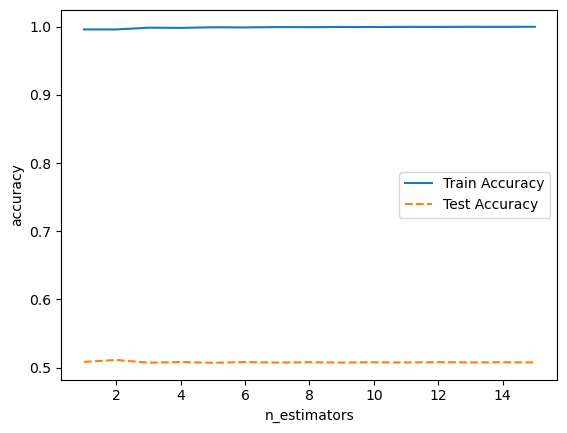

In [43]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [49]:
oob_error = []

for v_n_estimator in tqdm(range(5, 20)):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_tr_x, df_tr_y)
    oob_error.append(1 - rf.oob_score_)

100%|███████████████████████████████████████████| 15/15 [00:37<00:00,  2.50s/it]


Text(0.5, 0, 'n_estimators')

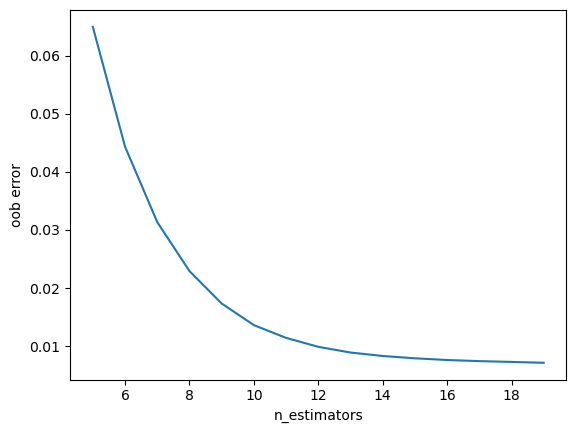

In [50]:
plt.plot(range(5, 20), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

### @max_depth(최대 깊이) 조정에 따른 정확도 변화
#### n_estimators =  2, 4, 6

In [59]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(2, 11)]

for v_max_depth in tqdm(para_depth):
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=6, random_state=1234)
    rf.fit(df_tr_x, df_tr_y)
    train_accuracy.append(rf.score(df_tr_x, df_tr_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

100%|█████████████████████████████████████████████| 9/9 [00:07<00:00,  1.13it/s]


In [60]:
# 모델 정확도 확인 
# estimator = 6
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,2,0.915,0.597
1,3,0.947,0.559
2,4,0.959,0.546
3,5,0.966,0.538
4,6,0.959,0.546
5,7,0.986,0.516
6,8,0.987,0.515
7,9,0.987,0.514
8,10,0.988,0.513


In [58]:
# 모델 정확도 확인
# estimator = 4
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,2,0.930,0.579
1,3,0.934,0.573
2,4,0.920,0.576
3,5,0.973,0.530
4,6,0.963,0.542
5,7,0.977,0.526
6,8,0.987,0.513
7,9,0.988,0.514
8,10,0.988,0.513


In [56]:
# 모델 정확도 확인
# estimator = 2
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,2,0.896,0.617
1,3,0.952,0.554
2,4,0.958,0.543
3,5,0.957,0.549
4,6,0.962,0.542
5,7,0.972,0.533
6,8,0.977,0.524
7,9,0.978,0.524
8,10,0.985,0.518


## @min_samples_split(분할 노드의 최소 샘플 수) 조정에 따른 정확도 변화
#### n_estimators = 4, max_depth = 6

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수.
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in tqdm(para_split):
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=6,
                                n_estimators=4, random_state=1234)
    rf.fit(df_tr_x, df_tr_y)
    train_accuracy.append(rf.score(df_tr_x, df_tr_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.53it/s]


In [63]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.976,0.527
1,20,0.976,0.527
2,30,0.976,0.527
3,40,0.979,0.523
4,50,0.979,0.523
5,60,0.979,0.523
6,70,0.979,0.523
7,80,0.975,0.526
8,90,0.975,0.526
9,100,0.975,0.526


### min_samples_leaf(최소 잎사귀 수) 조정에 따른 정확도 변화
#### n_estimators = 4, max_depth = 6, min_samples_split = 30

In [65]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in tqdm(para_leaf):
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 30,
                                max_depth=6, n_estimators=4, random_state=1234)
    rf.fit(df_tr_x, df_tr_y)
    train_accuracy.append(rf.score(df_tr_x, df_tr_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.48it/s]


In [66]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.976,0.527
1,10,0.967,0.537
2,15,0.976,0.527
3,20,0.979,0.523
4,25,0.975,0.526
5,30,0.975,0.526
6,35,0.960,0.543
7,40,0.960,0.543
8,45,0.960,0.543
9,50,0.960,0.543


In [244]:
# Hyper Parameter tuning 모델
rf_final = RandomForestClassifier(min_samples_leaf=35, max_depth=6, n_estimators=4, min_samples_split = 30,
                                  random_state=1234)
rf_final.fit(df_tr_x, df_tr_y)
# 평가

# 정확도
train_accuracy.append(rf_final.score(df_tr_x, df_tr_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

# 평가: Train 데이터
y_prob_1 = rf_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = rf_final.predict(df_test_x)

# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format((y_pred == df_test_y).mean()))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Accuracy on test set: 0.543

              precision    recall  f1-score   support

           0      0.964     0.138     0.241     33881
           1      0.509     0.994     0.674     30493

    accuracy                          0.543     64374
   macro avg      0.737     0.566     0.457     64374
weighted avg      0.749     0.543     0.446     64374



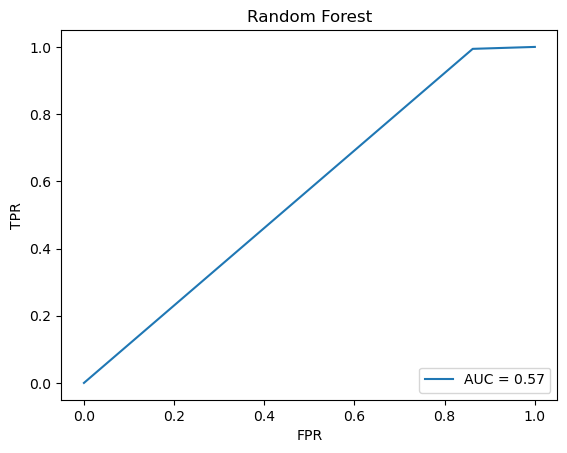

In [245]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR") 
plt.show()

In [246]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6735612010264044]

### 최종모델

rf_final = RandomForestClassifier(min_samples_leaf=35, max_depth=6, n_estimators=4, min_samples_split = 30 , random_state=1234)

- Hyper Parameter 조정한 모델이 GridSearch한 모델보다 성능이 더 좋게 나타났다.

## @XGboost

In [247]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [248]:
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
xgboost_user

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [249]:
eval_df = [(df_test_x, df_test_y)]

xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
xgboost_user.fit(df_tr_x, df_tr_y)

# 정확도
train_accuracy.append(xgboost_user.score(df_tr_x, df_tr_y))
test_accuracy.append(xgboost_user.score(df_test_x, df_test_y))

threshold = 0.5

# 예측값
test_prob = xgboost_user.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
test_pred = xgboost_user.predict(df_test_x) 

# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format((test_pred == df_test_y).mean()))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, test_pred)),"\n")
print(classification_report(df_test_y, test_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, test_prob)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Accuracy on test set: 0.509

Confusion matrix: 
[[ 2376 31505]
 [  100 30393]] 

              precision    recall  f1-score   support

           0      0.960     0.070     0.131     33881
           1      0.491     0.997     0.658     30493

    accuracy                          0.509     64374
   macro avg      0.725     0.533     0.394     64374
weighted avg      0.738     0.509     0.380     64374



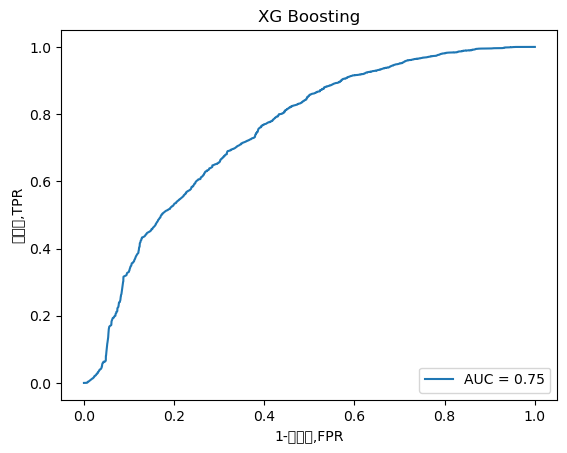

In [250]:
plt.title("XG Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [251]:
# precision, recall score
model_precision.append(precision_score(df_test_y, test_pred))
model_recall.append(recall_score(df_test_y, test_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, test_pred))
model_f1_score

[0.6735612010264044, 0.6579212260934506]

In [252]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
RandomForest,0.960,0.543,0.566,0.509,0.994,0.674
XGBoosting,0.994,0.509,0.748,0.491,0.997,0.658


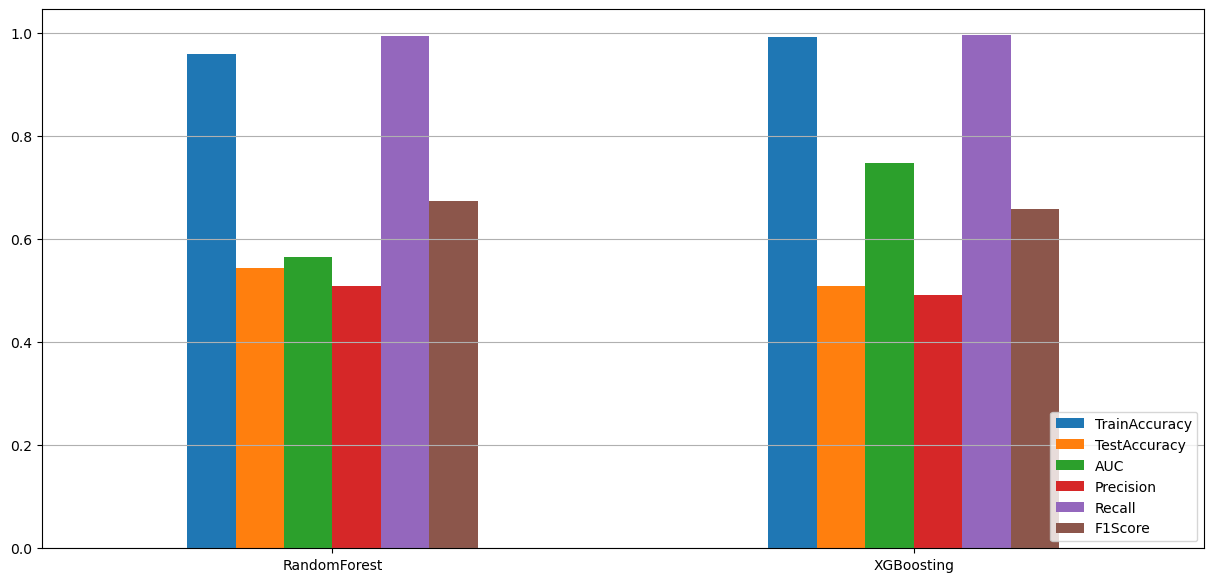

In [253]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(15,7))
plt.legend(loc="lower right")
plt.grid(axis = "y")

### 랜덤포레스트가 XGBoosting보다 우수한 TestAccuracy를 보인다.